## k-최근접 이웃 알고리즘

<div align=center><img src="../data/knn.png"></div>

패턴 인식에서 k-NN은 분류 알고리즘이다. 비슷한 특성을 가진 데이터는 비슷한 범주에 속하는 경향이 있다는 가정 하에 사용한다.

새로운 데이터가 주어졌을 때, 이 데이터와 가장 가까운 K개의 이웃한 데이터들을 찾아 새로운 데이터의 클래스 또는 값을 예측하는 방식으로 동작한다. 여기서 이웃 데이터들은 거리를 기반으로 판단된다. 즉, 가장 가까운 거리에 있는 K개의 데이터들을 선택하여 그들이 속한 클래스나 값으로 예측하는 것이다.

즉, 새로운 데이터 포인트는 어느 그룹에 속하는 게 맞는지를 분류하는 것이 되겠다.

## K값 선정 방식
K-NN알고리즘에서 K값은 분류하는 데이터 포인트와 가장 가까운 K개의 이웃 데이터 포인트를 선택하는 데 사용된다. 

K값을 선택하는 것은 알고리즘이 어떻게 작동할 지에 영향을 미친다. 작은 K값은 데이터 포인트와 가까운 이웃들의 특징을 보다 잘 반영하지만, 잡음과 이상치 등 노이즈를 포함하기 쉽고, 반대로 큰 K값은 더 많은 이웃을 포함하기 때문에 잡음과 이상치 등 노이즈의 영향을 줄이지만, 데이터 포인트 주변의 세부적인 특성을 파악하기 어렵다.

따라서 적절한 K값을 선택하는 것은 분류 정확도를 높이는 데 중요하다. K값을 선택하는 방법에는 교차 검증 등의 방법을 사용하여 최적의 K값을 차즌ㄴ 것이 일반적이다. K값을 선택할 때는 데이터셋의 특성과 분류 문제의 성격에 따라 적절한 K값을 선택해야 한다. 데이터셋이 노이즈가 많은 경우 작은 K값을 선택하고, 데이터셋이 복잡한 패턴을 가지고 있어나 클래스 간 경계가 모호한 경우 큰 K값을 선택하는 것이 적합할 수 있다.

In [2]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

X = np.array([
    [1, 1, 0, 0, 0],
    [0, 1, 0, 1, 1],
    [1, 0, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 1, 1, 0, 1],
    [1, 0, 0, 1, 0]
    ])

# 값들 간 유사도 계산
model = NearestNeighbors(metric="cosine", algorithm="brute")
model.fit(X)

# 유사한 값 추출
query_item = [0, 1, 0, 1, 0]
query_item = np.array(query_item).reshape(1, -1)
distance, indices = model.kneighbors(query_item, n_neighbors=2)

# 유사한 아이템을 기반으로 추천 아이템 예측
recommend_items = set()
for idx in indices.squeeze():
    items = np.argwhere(X[idx, :] == 1).squeeze().tolist()
    recommend_items.update(items)

recommend_items = recommend_items - set(np.argwhere(query_item.squeeze() == 1).squeeze().tolist())
recommend_items


{0, 4}

## knn의 장점
1. 간단하고 이해하기 쉽다
    - knn알고리즘은 매우 간단하며, 데이터 포인트 간 거리 기반으로 분류 또는 회귀 문제를 해결한다. 이러한 간단한 구조로 인해, 데이터의 복잡도가 높지 않은 경우 적은 노력으로 분류기를 만들 수 있다.

2. 학습 데이터의 분포를 고려하지 않아도 된다.
    - knn알고리즘은 학습 데이터의 분포나 특성을 고려하지 않는다. 즉, 데이터가 어떤 분포를 따르더라도 거리 기반으로 분류가 가능하다. 이러한 특성으로 인해 k-nn 알고리즘은 데이터셋의 특성을 파악하기 어려운 경우에도 적용할 수 있다.

3. 높은 분류 정확도
    - k-nn 알고리즘의 경우 데이터 포인트 간 거리 기반으로 분류하기 때문에, 분류의 정확도가 높다. 특히, 클래스 간 경계가 잘 구분되는 경우에는 분류 성능이 더욱 향상된다.

4. 적은 데이터셋에서도 잘 작동함
    - k-nn 알고리즘은 적은 양의 학습 데이터에서도 잘 작동한다. 이는 학습 데이터가 많지 않거나, 학습 데이터가 많아도 분류하기 어려운 경우에 유용하다.

5. 다목적으로 사용 가능
    - k-nn 알고리즘의 경우 분류와 회귀 문제 모두에 적용할 수 있다. 즉, 데이터 포인트가 어떤 값에 속하는지 판별하는 분류 문제 뿐만 아니라, 데이터 포인트의 값을 예측하는 회귀 문제에도 적용할 수 있다.

## k-nn의 단점
1. 계산 복잡도가 높다
    - k-nn 알고리즘은 모든 훈련 데이터를 기억해야 하므로, 데이터가 많을 수록 메모리 사용량이 늘어나고, 새로운 데이터를 분류할 때 마다 모든 데이터와의 거리를 계산해야 한다. 이러한 계산 복잡도 때문에 대규모 데이터셋에서는 시간이 많이 소요된다.

2. 차원의 저주
    - 데이터의 차원이 늘어나면, 공간의 부피가 기하급수적으로 커지는데, 이러한 현상을 차원의 저주라고 한다. k-nn 알고리즘도 차원의 저주로 인해 정확도가 저하된다. 이를 해결하기 위해서는 차원 축소 기법 등을 적용할 수 있다.

3. 이상치에 민감함
    - k-nn 알고리즘은 주변 이웃 데이터를 기반으로 분류를 수행하기 때문에, 이상치에 민감하다. 이상치가 존재하면, 분류 결과가 올바르지 않을 가능성이 높다.

4. 클래스 불균형 문제
    - 클래스 불균형 문제는 한 클래스의 데이터가 다른 클래스의 데이터보다 월등히 많은 경우를 의미한다. 이러한 경우, k-nn 알고리즘은 적은 클래스의 데이터를 제대로 분류하지 못할 수 있다. 이를 해결하기 위해서는 샘플링 기법 등을 적용할 수 있다.

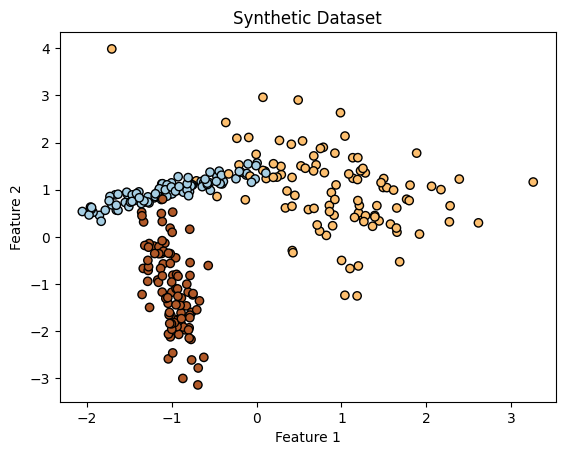

In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 임의의 데이터셋 생성
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3, random_state=42)

# 8:2 비율로 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# 임의의 데이터셋 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Synthetic Dataset")
plt.show()

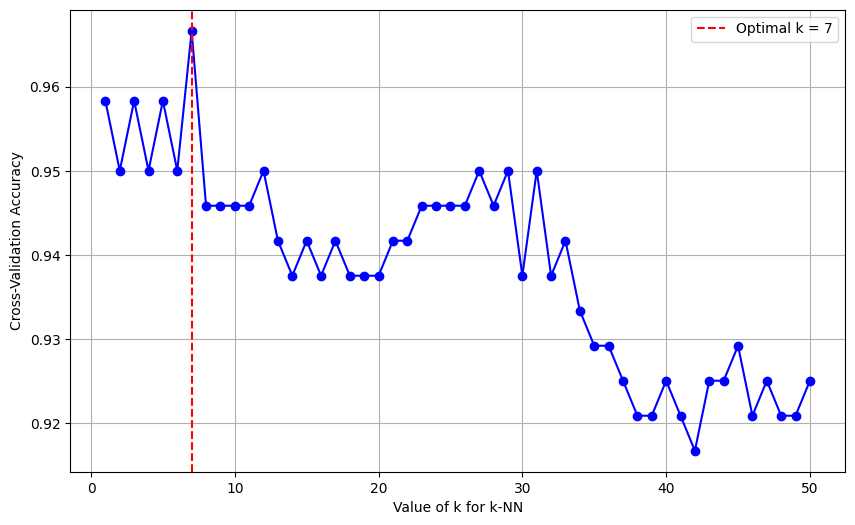

In [5]:
# 교차검증을 통해 최적의 K값 도출
k_values = list(range(1, 51))
cross_val_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")
    cross_val_scores.append(scores.mean())
    
optimal_k = k_values[cross_val_scores.index(max(cross_val_scores))]

# 교차 검증의 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_values, cross_val_scores, marker="o", linestyle="-", color="b")
plt.xlabel("Value of k for k-NN")
plt.ylabel("Cross-Validation Accuracy")
plt.axvline(x=optimal_k, color="r", linestyle="--", label=f"Optimal k = {optimal_k}")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# k = 7 에서의 교차 검증 정확도가 가장 높았다.
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

knn_optimal.fit(X_train, y_train)
knn_optimal.score(X_test, y_test)

0.9333333333333333

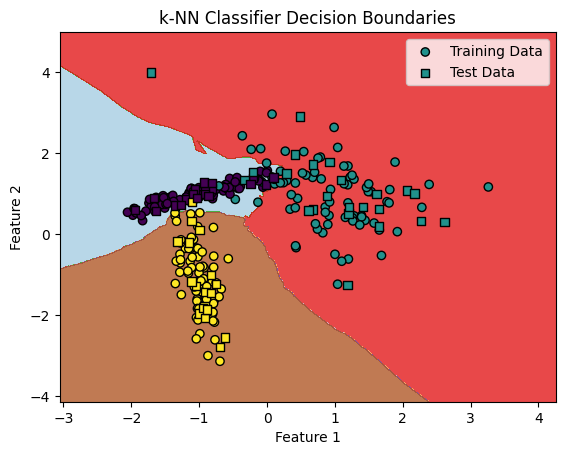

: 

In [7]:
# 결정 경계 시각화
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = knn_optimal.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors="k", marker="o", label="Training Data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", marker="s", label="Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("k-NN Classifier Decision Boundaries")
plt.legend()
plt.show()